Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.

In [10]:
#FIRST: PARSING
%pip install scikit-learn
%pip install torch
%pip install torchvision
import sklearn
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [293]:
# Parse the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())
# print(mnist_train)
# print(mnist_test)

# convert to numpy, tensor to numpy
train_images = mnist_train.data.numpy().astype(np.float64)
train_labels = mnist_train.targets.numpy()
print(train_images.shape, train_labels.shape)

test_images = mnist_test.data.numpy().astype(np.float64) 
test_labels = mnist_test.targets.numpy()
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

Text(0.5, 1.0, 'Label: 5')

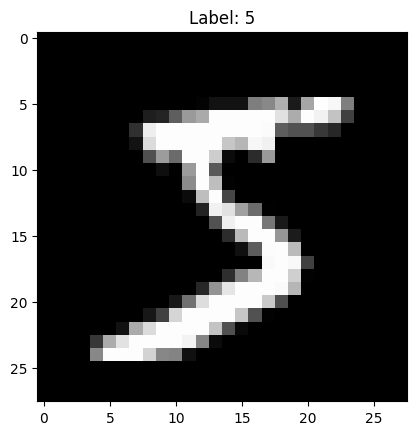

In [264]:
# VISUALIZATION:
print(train_images[0])
print(type(train_images[0]))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [265]:
%pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [266]:
# SECOND TASK: normalization

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
# 3. Term-Frequency (TF) weighting:
    # Map each term in a document with its frequency (text only), up to me to determine appropriate normalization

# MNIST Dataset: 
    # Make sure any value transformation retains the 0 values
    # <0, 255> -> <0, 1> essentially black and white

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
shift_scale_train_images = train_images / 255.0



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Text(0.5, 1.0, 'Label: 5')

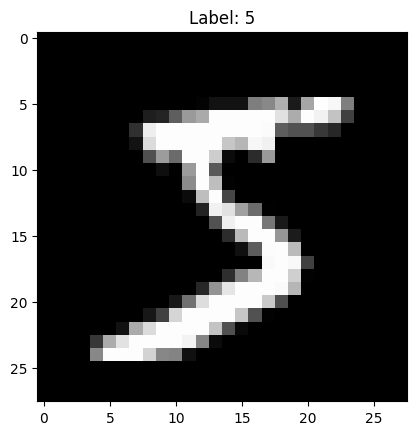

In [267]:
# Visualize the first image after normalization:
print(shift_scale_train_images[0])
print(type(shift_scale_train_images[0]))
plt.imshow(shift_scale_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [268]:
# 2. Zero mean, unit variance
    # Subtract the mean, divide by the appropriate value to get variance = 1
mean = np.mean(train_images, axis=0)
print(mean.shape)
std = np.std(train_images, axis=0)
print(std.shape)
zero_mean_unit_variance_train_images = (train_images - mean) / std
# replace nan with 0
zero_mean_unit_variance_train_images = np.nan_to_num(zero_mean_unit_variance_train_images)

zero_mean_unit_variance_test_images = (test_images - mean) / std
# replace nan with 0
zero_mean_unit_variance_test_images = np.nan_to_num(zero_mean_unit_variance_test_images)


(28, 28)
(28, 28)


C:\Users\koola\AppData\Local\Temp\ipykernel_37204\2710829338.py:7: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = (train_images - mean) / std
C:\Users\koola\AppData\Local\Temp\ipykernel_37204\2710829338.py:11: RuntimeWarning: divide by zero encountered in divide
  zero_mean_unit_variance_test_images = (test_images - mean) / std
C:\Users\koola\AppData\Local\Temp\ipykernel_37204\2710829338.py:11: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_test_images = (test_images - mean) / std


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
  -8.522

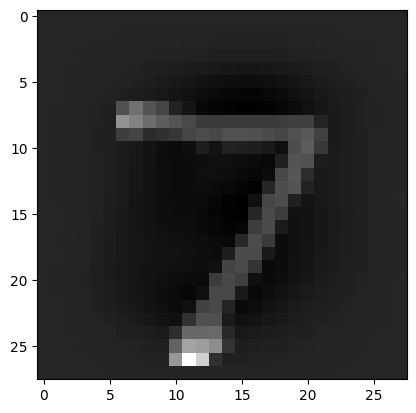

In [269]:
plt.imshow(zero_mean_unit_variance_test_images[0], cmap='gray')
print(zero_mean_unit_variance_test_images[0])
print(test_labels[0])

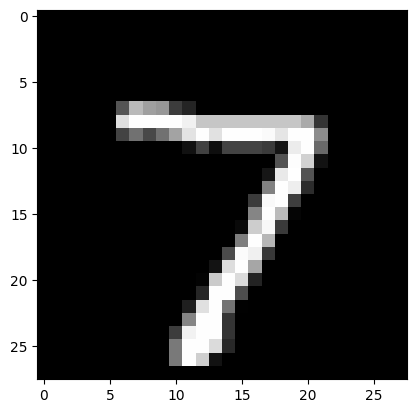

In [270]:
plt.imshow(test_images[0], cmap='gray')

In [271]:
# Zero mean from class notes:

# mew = np.sum(train_images, axis=0) / train_images.shape[0]
print(train_images[0][6])
print(np.mean(train_images[0][6]))

[  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]
103.57142857142857


In [272]:
print(mean) # Mean = pixel value for that specific spot across all images

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
  4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
  1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
  1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
  5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
  6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
  2.64

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
  -8.522

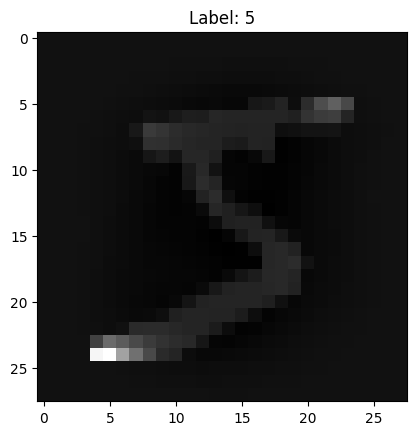

In [273]:
# Visualize:
print(zero_mean_unit_variance_train_images[0])
print(np.var(zero_mean_unit_variance_train_images[0])) # Should be close to 1
plt.imshow(zero_mean_unit_variance_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
print(np.mean(zero_mean_unit_variance_train_images[0])) # Should be close to 0


In [274]:
# Pairwise similarities metrics:

# 1. Euclidean distance(required, library)
    # a. required(your own, use batches)

# 2. Edit distance(required for text) OR cosine similarity(required for vectors)




In [275]:
# 1. Euclidean distance (library)

euclidean_distance = np.linalg.norm(train_images[0] - train_images[11])
#check:
    # zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[1])
    # shift_scale_train_images[0] - shift_scale_train_images[1])

print(euclidean_distance)
print(type(euclidean_distance))

print(train_labels[0]) # 5
print(train_labels[11]) # 5

print("\n")

for i in range(12):
    print(train_labels[i]) # 5, 0, 4, 1, 9, 2, 1, 3, 1, 4, ...
# The distance between 5 and 0 is: 2387.111


distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))

### THROW INTO FUNCTION :library 

2867.4593283950862
<class 'numpy.float64'>
5
5


5
0
4
1
9
2
1
3
1
4
3
5


In [276]:
# try with normalized:
SS_euclidean_distance = np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[10])
print(SS_euclidean_distance)

8.391501715310692


In [277]:
ZM_euclidean_distance = np.linalg.norm(zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[11])
print(ZM_euclidean_distance)

41.07952550854942


In [278]:
# I will be using the shift and scale normalization for the rest of the tasks: 

distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))

In [279]:
print(distances[:10]) # first 10 distances

[np.float64(0.0), np.float64(9.361222132577327), np.float64(10.875094558710726), np.float64(10.018901014936581), np.float64(10.480263577046502), np.float64(10.126636833057416), np.float64(9.50428139627975), np.float64(8.509666575199573), np.float64(9.3143710818562), np.float64(10.07571719003181)]


In [280]:
# zip together labels and distances
predictions = list(zip(train_labels, distances))

# create a function to get the top k predictions
def get_top_k_predictions(k, predictions):
    return sorted(predictions, key=lambda x: x[1])[:k]

def print_pred(predictions):
    for label, distance in predictions:
        print(f"Label: {label}, Distance: {distance}")

print_pred(get_top_k_predictions(20, predictions)) # top 5 predictions

# Create a final prediction that is the most common label among the top k predictions
def final_prediction(k, predictions):
    top_k = get_top_k_predictions(k, predictions)
    labels = [label for label, distance in top_k]
    return max(set(labels), key=labels.count)

print(final_prediction(20, predictions)) # final prediction for k=5

## PLACE INTO KNN CLASS 

Label: 5, Distance: 0.0
Label: 5, Distance: 6.123421106197849
Label: 5, Distance: 6.241574097341995
Label: 5, Distance: 6.253800382437516
Label: 3, Distance: 6.261605603114141
Label: 5, Distance: 6.2919488047527965
Label: 5, Distance: 6.293676607845121
Label: 5, Distance: 6.29689878083294
Label: 5, Distance: 6.31252698404212
Label: 5, Distance: 6.3282538970573015
Label: 5, Distance: 6.468091021389275
Label: 5, Distance: 6.486331412605749
Label: 5, Distance: 6.49174911813767
Label: 5, Distance: 6.530390317063363
Label: 5, Distance: 6.547765525107026
Label: 5, Distance: 6.59808320936299
Label: 5, Distance: 6.603753898481597
Label: 3, Distance: 6.6060135943987435
Label: 3, Distance: 6.626704912177665
Label: 5, Distance: 6.634280041175857
5


In [281]:
# Now lets test it on random images from the test set

# Get a random image from the test set
random_index = np.random.randint(0, len(test_images))
random_image = test_images[random_index]

# Normalize the random image
normalized_random_image = random_image / 255.0

# Calculate distances from the random image to all training images
test_distances = []
for i in range(len(shift_scale_train_images)):
    test_distances.append(np.linalg.norm(normalized_random_image - shift_scale_train_images[i]))

print_pred(get_top_k_predictions(20, list(zip(train_labels, test_distances))))
# Final prediction for the random image
print("Predicted: ", final_prediction(20, list(zip(train_labels, test_distances))))
print("Actual: ", test_labels[random_index]) # actual label of the random image

# RANDOMLY GUESS, INDICATE ACCURACY


Label: 7, Distance: 3.2905816689618343
Label: 7, Distance: 3.528688379026739
Label: 7, Distance: 3.531803111442239
Label: 7, Distance: 3.684206762579271
Label: 7, Distance: 3.829224516771798
Label: 7, Distance: 3.8320548492357127
Label: 7, Distance: 3.9267808498994765
Label: 7, Distance: 3.9353893713375947
Label: 7, Distance: 3.9355320033222188
Label: 7, Distance: 3.9360204298629275
Label: 7, Distance: 3.9576380437129686
Label: 7, Distance: 3.9939669997675997
Label: 7, Distance: 4.004530306512681
Label: 7, Distance: 4.048069489247086
Label: 7, Distance: 4.082535642254781
Label: 7, Distance: 4.130312919565933
Label: 7, Distance: 4.136717742287247
Label: 7, Distance: 4.146311062237927
Label: 7, Distance: 4.16655178619023
Label: 7, Distance: 4.212783314222933
Predicted:  7
Actual:  7


In [282]:
#implement a knn classifier for the MNIST dataset
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.train_images = None
        self.train_labels = None

    def fit(self, train_images, train_labels, norm):
        self.train_labels = train_labels
        if norm == "Shift and Scale":
            self.train_images = train_images / 255.0
            self.train_images = np.nan_to_num(self.train_images)
        elif norm == "Zero Mean Unit Variance":
            # self.train_images = (train_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
            # self.train_images = np.nan_to_num(self.train_images)
            self.train_images = zero_mean_unit_variance_train_images
        else:
            self.train_images = train_images
    
    def euclidean_distance_library(self, test_image, train_image):
        return np.linalg.norm(test_image - train_image)

    def euclidean_distance_own(self, test_image, train_image):
        return np.sqrt(np.sum((test_image - train_image) ** 2))

    def predict(self, test_image):
        
        # get the distances (entire training set for each test image)
        distances = [self.euclidean_distance_library(test_image, train_image) for train_image in self.train_images] # FASTER
        # distances = [self.euclidean_distance_own(test_image, train_image) for train_image in self.train_images] 

        # get the k smallest differencees and their indices
        top_k_indices = np.argsort(distances)[:self.k]
        top_k_labels = self.train_labels[top_k_indices]
        most_common = np.bincount(top_k_labels).argmax()

        return most_common

    


# SHIFT AND SCALE

In [283]:
# Test the KNN classifier
    # Normalization: Shift and Scale
    # k = 12
    # Euclidean distance: own implementation (CHANGE IN KNN CLASS)

knn = KNNClassifier(k = 12)
knn.fit(train_images, train_labels, norm="Shift and Scale")

# lets shrink the test size
# test_images_reduced = test_images[:100]

# remember to normalize test set as well
# test_images_reduced = test_images_reduced / 255.0

test_images = test_images / 255.0
# test_labels_reduced = test_labels[:100]
# print(test_images[0])
correct = 0
accuracy = 0.0
accuracies = []

for i in tqdm(range(len(test_images))):
    prediction = knn.predict(test_images[i])
    # print(f"Predicted: {prediction}, Actual: {test_labels[i]}")
    # prediction = knn.predict_library(test_images[i])
    # acc = accuracy_score(test_labels[i], prediction)
    # accuracies.append(accuracy)\\
    # print(f"Predicted: {prediction}, Actual: {test_labels[i]}, Accuracy: {acc}")

    if prediction == test_labels[i]:
        correct += 1
    accuracy = correct / (float(i) + 1)




100%|██████████| 10000/10000 [29:08<00:00,  5.72it/s]


In [284]:
#Shift and Scale
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct: {correct}/{len(test_images)}")
print(f"Incorrect: {len(test_images) - correct}/{len(test_images)}")

Accuracy: 96.61%
Correct: 9661/10000
Incorrect: 339/10000


# ZERO MEAN UNIT VARIANCE

In [294]:
# Test the KNN classifier
    # Normalization: Zero Mean Unit Variance
    # k = 12
    # Euclidean distance: Library (CHANGE IN KNN CLASS)

knn = KNNClassifier(k = 12)
knn.fit(train_images, train_labels, norm="Zero Mean Unit Variance")



# remember to normalize test set as well
zero_mean_unit_variance_test_images = (test_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
zero_mean_unit_variance_test_images = np.nan_to_num(zero_mean_unit_variance_test_images)

# lets shrink the test size
# test_images_reduced = zero_mean_unit_variance_test_images[:100]

correct = 0
accuracy = 0.0
accuracies = []

for i in tqdm(range(150)):
    prediction = knn.predict(zero_mean_unit_variance_test_images[i])
    print(f"Predicted: {prediction}, Actual: {test_labels[i]}")
    # prediction = knn.predict_library(test_images[i])
    # acc = accuracy_score(test_labels[i], prediction)
    # accuracies.append(accuracy)\\
    # print(f"Predicted: {prediction}, Actual: {test_labels[i]}, Accuracy: {acc}")

    if prediction == test_labels[i]:
        correct += 1
    accuracy = correct / (float(i) + 1)

# knn.predict_library(test_images[0])



C:\Users\koola\AppData\Local\Temp\ipykernel_37204\4229096346.py:12: RuntimeWarning: divide by zero encountered in divide
  zero_mean_unit_variance_test_images = (test_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
C:\Users\koola\AppData\Local\Temp\ipykernel_37204\4229096346.py:12: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_test_images = (test_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
  1%|          | 1/150 [00:00<00:31,  4.72it/s]

Predicted: 7, Actual: 7
Predicted: 2, Actual: 2


  2%|▏         | 3/150 [00:00<00:31,  4.61it/s]

Predicted: 1, Actual: 1
Predicted: 0, Actual: 0


  3%|▎         | 5/150 [00:01<00:30,  4.78it/s]

Predicted: 4, Actual: 4
Predicted: 1, Actual: 1


  5%|▌         | 8/150 [00:01<00:26,  5.30it/s]

Predicted: 4, Actual: 4
Predicted: 9, Actual: 9


  6%|▌         | 9/150 [00:01<00:26,  5.38it/s]

Predicted: 4, Actual: 5
Predicted: 9, Actual: 9


  8%|▊         | 12/150 [00:02<00:24,  5.52it/s]

Predicted: 0, Actual: 0
Predicted: 6, Actual: 6


  9%|▉         | 14/150 [00:02<00:24,  5.53it/s]

Predicted: 9, Actual: 9
Predicted: 0, Actual: 0


 11%|█         | 16/150 [00:03<00:24,  5.57it/s]

Predicted: 1, Actual: 1
Predicted: 5, Actual: 5


 12%|█▏        | 18/150 [00:03<00:23,  5.61it/s]

Predicted: 9, Actual: 9
Predicted: 7, Actual: 7


 13%|█▎        | 19/150 [00:03<00:23,  5.61it/s]

Predicted: 5, Actual: 3
Predicted: 4, Actual: 4


 15%|█▍        | 22/150 [00:04<00:22,  5.58it/s]

Predicted: 9, Actual: 9
Predicted: 6, Actual: 6


 15%|█▌        | 23/150 [00:04<00:22,  5.53it/s]

Predicted: 6, Actual: 6
Predicted: 5, Actual: 5


 17%|█▋        | 25/150 [00:04<00:24,  5.14it/s]

Predicted: 4, Actual: 4


 17%|█▋        | 26/150 [00:04<00:25,  4.92it/s]

Predicted: 0, Actual: 0


 18%|█▊        | 27/150 [00:05<00:25,  4.86it/s]

Predicted: 7, Actual: 7
Predicted: 4, Actual: 4


 19%|█▉        | 29/150 [00:05<00:25,  4.81it/s]

Predicted: 0, Actual: 0
Predicted: 1, Actual: 1


 21%|██▏       | 32/150 [00:06<00:22,  5.19it/s]

Predicted: 3, Actual: 3
Predicted: 1, Actual: 1


 22%|██▏       | 33/150 [00:06<00:22,  5.15it/s]

Predicted: 3, Actual: 3
Predicted: 0, Actual: 4


 24%|██▍       | 36/150 [00:06<00:21,  5.28it/s]

Predicted: 7, Actual: 7
Predicted: 2, Actual: 2


 25%|██▍       | 37/150 [00:07<00:21,  5.34it/s]

Predicted: 7, Actual: 7
Predicted: 1, Actual: 1


 27%|██▋       | 40/150 [00:07<00:20,  5.37it/s]

Predicted: 3, Actual: 2
Predicted: 1, Actual: 1


 28%|██▊       | 42/150 [00:07<00:19,  5.48it/s]

Predicted: 1, Actual: 1
Predicted: 7, Actual: 7


 29%|██▉       | 44/150 [00:08<00:18,  5.59it/s]

Predicted: 4, Actual: 4
Predicted: 1, Actual: 2


 30%|███       | 45/150 [00:08<00:18,  5.57it/s]

Predicted: 3, Actual: 3


 31%|███▏      | 47/150 [00:08<00:19,  5.16it/s]

Predicted: 5, Actual: 5
Predicted: 1, Actual: 1


 32%|███▏      | 48/150 [00:09<00:19,  5.32it/s]

Predicted: 2, Actual: 2
Predicted: 4, Actual: 4


 34%|███▍      | 51/150 [00:09<00:18,  5.48it/s]

Predicted: 4, Actual: 4
Predicted: 6, Actual: 6


 35%|███▌      | 53/150 [00:10<00:17,  5.58it/s]

Predicted: 3, Actual: 3
Predicted: 5, Actual: 5


 37%|███▋      | 55/150 [00:10<00:16,  5.61it/s]

Predicted: 5, Actual: 5
Predicted: 6, Actual: 6


 38%|███▊      | 57/150 [00:10<00:16,  5.62it/s]

Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


 39%|███▉      | 59/150 [00:11<00:16,  5.66it/s]

Predicted: 1, Actual: 1
Predicted: 9, Actual: 9


 41%|████      | 61/150 [00:11<00:15,  5.61it/s]

Predicted: 1, Actual: 5
Predicted: 7, Actual: 7


 42%|████▏     | 63/150 [00:11<00:15,  5.61it/s]

Predicted: 2, Actual: 8
Predicted: 9, Actual: 9


 43%|████▎     | 65/150 [00:12<00:14,  5.67it/s]

Predicted: 3, Actual: 3
Predicted: 7, Actual: 7


 45%|████▍     | 67/150 [00:12<00:14,  5.66it/s]

Predicted: 4, Actual: 4
Predicted: 6, Actual: 6


 46%|████▌     | 69/150 [00:12<00:14,  5.65it/s]

Predicted: 4, Actual: 4
Predicted: 3, Actual: 3


 47%|████▋     | 71/150 [00:13<00:13,  5.66it/s]

Predicted: 0, Actual: 0
Predicted: 7, Actual: 7


 49%|████▊     | 73/150 [00:13<00:13,  5.64it/s]

Predicted: 0, Actual: 0
Predicted: 2, Actual: 2


 50%|█████     | 75/150 [00:13<00:13,  5.65it/s]

Predicted: 7, Actual: 9
Predicted: 1, Actual: 1


 51%|█████▏    | 77/150 [00:14<00:13,  5.59it/s]

Predicted: 7, Actual: 7
Predicted: 3, Actual: 3


 52%|█████▏    | 78/150 [00:14<00:12,  5.63it/s]

Predicted: 2, Actual: 2
Predicted: 9, Actual: 9


 53%|█████▎    | 80/150 [00:14<00:12,  5.59it/s]

Predicted: 7, Actual: 7
Predicted: 9, Actual: 7


 55%|█████▌    | 83/150 [00:15<00:12,  5.56it/s]

Predicted: 6, Actual: 6
Predicted: 2, Actual: 2


 56%|█████▌    | 84/150 [00:15<00:12,  5.49it/s]

Predicted: 7, Actual: 7
Predicted: 8, Actual: 8


 57%|█████▋    | 86/150 [00:15<00:11,  5.46it/s]

Predicted: 4, Actual: 4
Predicted: 7, Actual: 7


 59%|█████▊    | 88/150 [00:16<00:11,  5.43it/s]

Predicted: 3, Actual: 3
Predicted: 6, Actual: 6


 61%|██████    | 91/150 [00:16<00:11,  5.27it/s]

Predicted: 1, Actual: 1
Predicted: 3, Actual: 3


 61%|██████▏   | 92/150 [00:17<00:10,  5.31it/s]

Predicted: 6, Actual: 6
Predicted: 9, Actual: 9


 63%|██████▎   | 94/150 [00:17<00:10,  5.40it/s]

Predicted: 3, Actual: 3
Predicted: 1, Actual: 1


 64%|██████▍   | 96/150 [00:17<00:10,  5.21it/s]

Predicted: 4, Actual: 4


 65%|██████▍   | 97/150 [00:18<00:12,  4.12it/s]

Predicted: 1, Actual: 1
Predicted: 2, Actual: 7


 67%|██████▋   | 100/150 [00:18<00:10,  4.92it/s]

Predicted: 6, Actual: 6
Predicted: 9, Actual: 9


 67%|██████▋   | 101/150 [00:18<00:09,  5.10it/s]

Predicted: 6, Actual: 6
Predicted: 0, Actual: 0


 69%|██████▊   | 103/150 [00:19<00:09,  5.11it/s]

Predicted: 5, Actual: 5
Predicted: 4, Actual: 4


 71%|███████   | 106/150 [00:19<00:08,  5.16it/s]

Predicted: 9, Actual: 9
Predicted: 9, Actual: 9


 71%|███████▏  | 107/150 [00:20<00:08,  5.06it/s]

Predicted: 2, Actual: 2


 72%|███████▏  | 108/150 [00:20<00:08,  4.87it/s]

Predicted: 1, Actual: 1
Predicted: 9, Actual: 9


 73%|███████▎  | 110/150 [00:20<00:07,  5.04it/s]

Predicted: 4, Actual: 4


 74%|███████▍  | 111/150 [00:20<00:08,  4.36it/s]

Predicted: 8, Actual: 8


 75%|███████▍  | 112/150 [00:21<00:09,  4.15it/s]

Predicted: 7, Actual: 7
Predicted: 3, Actual: 3


 76%|███████▌  | 114/150 [00:21<00:07,  4.67it/s]

Predicted: 9, Actual: 9
Predicted: 7, Actual: 7


 78%|███████▊  | 117/150 [00:22<00:06,  5.15it/s]

Predicted: 4, Actual: 4
Predicted: 4, Actual: 4


 79%|███████▊  | 118/150 [00:22<00:06,  5.09it/s]

Predicted: 4, Actual: 4
Predicted: 9, Actual: 9


 80%|████████  | 120/150 [00:22<00:05,  5.30it/s]

Predicted: 2, Actual: 2
Predicted: 5, Actual: 5


 81%|████████▏ | 122/150 [00:23<00:05,  5.45it/s]

Predicted: 4, Actual: 4
Predicted: 7, Actual: 7


 83%|████████▎ | 125/150 [00:23<00:04,  5.47it/s]

Predicted: 6, Actual: 6
Predicted: 7, Actual: 7


 85%|████████▍ | 127/150 [00:24<00:04,  5.21it/s]

Predicted: 4, Actual: 9
Predicted: 0, Actual: 0


 85%|████████▌ | 128/150 [00:24<00:04,  5.03it/s]

Predicted: 5, Actual: 5
Predicted: 8, Actual: 8


 87%|████████▋ | 130/150 [00:24<00:03,  5.10it/s]

Predicted: 5, Actual: 5
Predicted: 6, Actual: 6


 88%|████████▊ | 132/150 [00:25<00:03,  5.04it/s]

Predicted: 6, Actual: 6


 89%|████████▊ | 133/150 [00:25<00:03,  4.93it/s]

Predicted: 5, Actual: 5
Predicted: 7, Actual: 7


 90%|█████████ | 135/150 [00:25<00:02,  5.04it/s]

Predicted: 8, Actual: 8
Predicted: 1, Actual: 1


 92%|█████████▏| 138/150 [00:26<00:02,  5.39it/s]

Predicted: 0, Actual: 0
Predicted: 1, Actual: 1


 93%|█████████▎| 140/150 [00:26<00:01,  5.54it/s]

Predicted: 6, Actual: 6
Predicted: 4, Actual: 4


 95%|█████████▍| 142/150 [00:26<00:01,  5.59it/s]

Predicted: 6, Actual: 6
Predicted: 7, Actual: 7


 95%|█████████▌| 143/150 [00:27<00:01,  5.60it/s]

Predicted: 3, Actual: 3
Predicted: 1, Actual: 1


 97%|█████████▋| 146/150 [00:27<00:00,  5.64it/s]

Predicted: 7, Actual: 7
Predicted: 1, Actual: 1


 99%|█████████▊| 148/150 [00:27<00:00,  5.62it/s]

Predicted: 8, Actual: 8
Predicted: 2, Actual: 2


100%|██████████| 150/150 [00:28<00:00,  5.25it/s]

Predicted: 0, Actual: 0
Predicted: 2, Actual: 2


100%|██████████| 150/150 [00:28<00:00,  5.29it/s]


In [295]:
# ZERO MEAN UNIT VARIANCE
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct: {correct}/{150}")
print(f"Incorrect: {150 - correct}/{150}")


Accuracy: 92.67%
Correct: 139/150
Incorrect: 11/150


# 20 NEWS GROUP:

In [106]:
# FIRST TASK: Parse the 20 newsgroups dataset
# newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
# newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
labels = newsgroups.target

# print(len(labels)) # 18846
# # label names
# print(newsgroups_train.target_names)
# # example of a document's data
# print(newsgroups_train.data[0])
# # this example document's target label
# print(newsgroups_train.target[0])
# print(newsgroups_train.target_names[newsgroups_train.target[0]])

# # number of documents in the training and test sets
# print(np.shape(newsgroups_train))
# print(np.shape(newsgroups_test))

In [110]:
# SECOND TASK: TF-IDF Vectorization
    # Term Frequency: How often a word appears in the document
    # Inverse document frequency: How often a word appears in the entire corpus

vectorizer = TfidfVectorizer(max_df = 0.5, min_df=5, stop_words='english')

vectorized_data = vectorizer.fit_transform(newsgroups.data)
# train_vectorized = vectorizer.fit_transform(newsgroups.data)
# test_vectorized = vectorizer.transform(newsgroups.data)

# X_train = vectorizer.fit_transform(newsgroups_train.data)
# X_test = vectorizer.fit_transform(newsgroups_test.data)
#print(vectorized_data.shape)
#split data into train and test sets
train_set = vectorized_data[:15000]
train_labels = labels[:15000]
test_set = vectorized_data[15000:]
test_labels = labels[15000:]
# print(X_train[0].toarray())
# print(X_train[0].toarray().shape)

In [109]:
# 2. Cosine Similarity (required for vectors)

from sklearn.metrics.pairwise import cosine_similarity

# create a function for cosine similarity of two documents:
def cosine_similarity_docs(doc1, doc2):
    return cosine_similarity(doc1, doc2)

# Calculate the cosine similarity between the first two documents in the training set
cosine_sim = cosine_similarity(vectorized_data[0], vectorized_data[1])
print(cosine_sim)


[[0.]]


In [102]:
# KNN Classifier for text data

class KNNTextClassifier:
    
    def __init__(self, k):
        self.k = k
        self.train_data = None
        self.train_labels = None

    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self, test_data):
        distances = []
        for i in range(np.shape(self.train_data)[0]):
            # Use cosine similarity for text data
            distance = 1 - cosine_similarity(test_data, self.train_data[i])
            distances.append((self.train_labels[i], distance))

        # Sort by distance and get the top k predictions
        distances.sort(key=lambda x: x[1])
        top_k = distances[:self.k]

        # Get the most common label among the top k predictions
        labels = [label for label, _ in top_k]
        return max(set(labels), key=labels.count)

In [67]:
%pip install scipysparse
import scipy
from scipy.sparse import csr_matrix

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipysparse (from versions: none)
ERROR: No matching distribution found for scipysparse


In [113]:
#Test the KNN classifier on text data

knn_text = KNNTextClassifier(k=10)

knn_text.fit(train_set, train_labels) # fit on the training data

# print(X_test.shape)
# print(X_train.shape)
# print(type(X_test[0]))

accuracy = 0.0
correct = 0

# new = csr_matrix(X_test)
# # X_test = X_test.todense()
# new = new.todense()
# print(new.shape)
# X_test = new
# print(X_test.shape[0])

# for test_image in tqdm(range(test_set.shape[0])):
for test_image in tqdm(range(10)):
    prediction = knn_text.predict(test_set[test_image]) 
    print(f"Predicted: {newsgroups.target_names[prediction]}, Actual: {newsgroups.target_names[test_labels[test_image]]}")

    if prediction == test_labels[test_image]:
        correct += 1
    accuracy = correct / (test_image + 1)



 10%|█         | 1/10 [00:05<00:45,  5.07s/it]

Predicted: alt.atheism, Actual: soc.religion.christian


 20%|██        | 2/10 [00:10<00:41,  5.18s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 30%|███       | 3/10 [00:15<00:35,  5.12s/it]

Predicted: comp.sys.mac.hardware, Actual: soc.religion.christian


 40%|████      | 4/10 [00:20<00:30,  5.07s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


 50%|█████     | 5/10 [00:25<00:25,  5.04s/it]

Predicted: sci.med, Actual: sci.med


 60%|██████    | 6/10 [00:30<00:20,  5.03s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


 70%|███████   | 7/10 [00:35<00:14,  4.98s/it]

Predicted: talk.religion.misc, Actual: talk.religion.misc


 80%|████████  | 8/10 [00:40<00:09,  5.00s/it]

Predicted: sci.space, Actual: sci.space


 90%|█████████ | 9/10 [00:45<00:04,  5.00s/it]

Predicted: rec.sport.hockey, Actual: soc.religion.christian


100%|██████████| 10/10 [00:50<00:00,  5.05s/it]

Predicted: misc.forsale, Actual: rec.sport.hockey


In [115]:
# 20 NG
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct: {correct}/{10}")
print(f"Incorrect: {10 - correct}/{10}")

Accuracy: 60.00%
Correct: 6/10
Incorrect: 4/10


In [116]:
#Test the KNN classifier on text data

knn_text = KNNTextClassifier(k=10)

knn_text.fit(train_set, train_labels) # fit on the training data

# print(X_test.shape)
# print(X_train.shape)
# print(type(X_test[0]))

accuracy = 0.0
correct = 0

# new = csr_matrix(X_test)
# # X_test = X_test.todense()
# new = new.todense()
# print(new.shape)
# X_test = new
# print(X_test.shape[0])

# for test_image in tqdm(range(test_set.shape[0])):
for test_image in tqdm(range(100)):
    prediction = knn_text.predict(test_set[test_image]) 
    print(f"Predicted: {newsgroups.target_names[prediction]}, Actual: {newsgroups.target_names[test_labels[test_image]]}")

    if prediction == test_labels[test_image]:
        correct += 1
    accuracy = correct / (test_image + 1)

  1%|          | 1/100 [00:05<08:20,  5.06s/it]

Predicted: alt.atheism, Actual: soc.religion.christian


  2%|▏         | 2/100 [00:10<08:19,  5.10s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


  3%|▎         | 3/100 [00:15<08:07,  5.02s/it]

Predicted: comp.sys.mac.hardware, Actual: soc.religion.christian


  4%|▍         | 4/100 [00:20<07:58,  4.99s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


  5%|▌         | 5/100 [00:25<07:52,  4.98s/it]

Predicted: sci.med, Actual: sci.med


  6%|▌         | 6/100 [00:30<07:50,  5.00s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


  7%|▋         | 7/100 [00:34<07:41,  4.96s/it]

Predicted: talk.religion.misc, Actual: talk.religion.misc


  8%|▊         | 8/100 [00:39<07:37,  4.98s/it]

Predicted: sci.space, Actual: sci.space


  9%|▉         | 9/100 [00:44<07:28,  4.93s/it]

Predicted: rec.sport.hockey, Actual: soc.religion.christian


 10%|█         | 10/100 [00:49<07:26,  4.96s/it]

Predicted: misc.forsale, Actual: rec.sport.hockey


 11%|█         | 11/100 [00:54<07:19,  4.94s/it]

Predicted: comp.sys.ibm.pc.hardware, Actual: comp.graphics


 12%|█▏        | 12/100 [00:59<07:14,  4.94s/it]

Predicted: comp.graphics, Actual: comp.graphics


 13%|█▎        | 13/100 [01:04<07:10,  4.95s/it]

Predicted: sci.electronics, Actual: rec.sport.baseball


 14%|█▍        | 14/100 [01:09<07:09,  4.99s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 15%|█▌        | 15/100 [01:14<07:02,  4.98s/it]

Predicted: soc.religion.christian, Actual: rec.motorcycles


 16%|█▌        | 16/100 [01:19<07:01,  5.02s/it]

Predicted: comp.sys.mac.hardware, Actual: comp.os.ms-windows.misc


 17%|█▋        | 17/100 [01:24<06:56,  5.02s/it]

Predicted: misc.forsale, Actual: misc.forsale


 18%|█▊        | 18/100 [01:29<06:50,  5.01s/it]

Predicted: comp.sys.mac.hardware, Actual: comp.sys.mac.hardware


 19%|█▉        | 19/100 [01:34<06:43,  4.98s/it]

Predicted: rec.sport.hockey, Actual: talk.politics.misc


 20%|██        | 20/100 [01:39<06:46,  5.08s/it]

Predicted: rec.sport.hockey, Actual: rec.sport.hockey


 21%|██        | 21/100 [01:45<06:45,  5.13s/it]

Predicted: sci.med, Actual: sci.med


 22%|██▏       | 22/100 [01:50<06:47,  5.22s/it]

Predicted: rec.motorcycles, Actual: rec.motorcycles


 23%|██▎       | 23/100 [01:56<06:48,  5.30s/it]

Predicted: talk.religion.misc, Actual: talk.religion.misc


 24%|██▍       | 24/100 [02:01<06:44,  5.32s/it]

Predicted: misc.forsale, Actual: comp.sys.mac.hardware


 25%|██▌       | 25/100 [02:06<06:32,  5.24s/it]

Predicted: sci.med, Actual: sci.med


 26%|██▌       | 26/100 [02:11<06:22,  5.17s/it]

Predicted: soc.religion.christian, Actual: soc.religion.christian


 27%|██▋       | 27/100 [02:16<06:13,  5.12s/it]

Predicted: comp.sys.mac.hardware, Actual: soc.religion.christian


 28%|██▊       | 28/100 [02:21<06:07,  5.10s/it]

Predicted: sci.crypt, Actual: sci.crypt


 29%|██▉       | 29/100 [02:26<06:00,  5.08s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 30%|███       | 30/100 [02:32<06:02,  5.18s/it]

Predicted: soc.religion.christian, Actual: soc.religion.christian


 31%|███       | 31/100 [02:38<06:16,  5.45s/it]

Predicted: comp.graphics, Actual: misc.forsale


 32%|███▏      | 32/100 [02:43<06:10,  5.44s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 33%|███▎      | 33/100 [02:48<05:59,  5.36s/it]

Predicted: rec.sport.hockey, Actual: rec.sport.hockey


 34%|███▍      | 34/100 [02:53<05:44,  5.22s/it]

Predicted: soc.religion.christian, Actual: rec.autos


 35%|███▌      | 35/100 [02:58<05:34,  5.15s/it]

Predicted: comp.sys.ibm.pc.hardware, Actual: comp.sys.ibm.pc.hardware


 36%|███▌      | 36/100 [03:03<05:26,  5.10s/it]

Predicted: rec.autos, Actual: rec.autos


 37%|███▋      | 37/100 [03:08<05:17,  5.04s/it]

Predicted: rec.sport.hockey, Actual: rec.sport.hockey


 38%|███▊      | 38/100 [03:13<05:12,  5.04s/it]

Predicted: sci.med, Actual: sci.med


 39%|███▉      | 39/100 [03:18<05:04,  4.99s/it]

Predicted: alt.atheism, Actual: comp.sys.mac.hardware


 40%|████      | 40/100 [03:23<04:55,  4.92s/it]

Predicted: rec.sport.hockey, Actual: rec.autos


 41%|████      | 41/100 [03:28<04:51,  4.94s/it]

Predicted: sci.med, Actual: talk.politics.guns


 42%|████▏     | 42/100 [03:33<04:50,  5.01s/it]

Predicted: rec.sport.baseball, Actual: rec.sport.baseball


 43%|████▎     | 43/100 [03:38<04:49,  5.07s/it]

Predicted: comp.graphics, Actual: comp.graphics


 44%|████▍     | 44/100 [03:43<04:43,  5.06s/it]

Predicted: sci.space, Actual: sci.space


 45%|████▌     | 45/100 [03:49<04:47,  5.24s/it]

Predicted: comp.sys.ibm.pc.hardware, Actual: sci.electronics


 46%|████▌     | 46/100 [03:54<04:44,  5.27s/it]

Predicted: rec.sport.baseball, Actual: rec.sport.baseball


 47%|████▋     | 47/100 [04:00<04:45,  5.38s/it]

Predicted: talk.politics.mideast, Actual: alt.atheism


 48%|████▊     | 48/100 [04:05<04:44,  5.46s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


 49%|████▉     | 49/100 [04:11<04:42,  5.54s/it]

Predicted: sci.electronics, Actual: sci.electronics


 50%|█████     | 50/100 [04:16<04:30,  5.41s/it]

Predicted: sci.med, Actual: sci.med


 51%|█████     | 51/100 [04:21<04:20,  5.32s/it]

Predicted: alt.atheism, Actual: soc.religion.christian


 52%|█████▏    | 52/100 [04:26<04:10,  5.23s/it]

Predicted: comp.windows.x, Actual: comp.windows.x


 53%|█████▎    | 53/100 [04:32<04:05,  5.22s/it]

Predicted: sci.crypt, Actual: sci.crypt


 54%|█████▍    | 54/100 [04:37<03:57,  5.17s/it]

Predicted: sci.crypt, Actual: sci.crypt


 55%|█████▌    | 55/100 [04:42<03:51,  5.15s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 56%|█████▌    | 56/100 [04:47<03:45,  5.12s/it]

Predicted: comp.windows.x, Actual: comp.graphics


 57%|█████▋    | 57/100 [04:52<03:40,  5.13s/it]

Predicted: sci.electronics, Actual: sci.electronics


 58%|█████▊    | 58/100 [04:58<03:45,  5.37s/it]

Predicted: comp.windows.x, Actual: comp.sys.mac.hardware


 59%|█████▉    | 59/100 [05:03<03:40,  5.39s/it]

Predicted: alt.atheism, Actual: alt.atheism


 60%|██████    | 60/100 [05:09<03:34,  5.36s/it]

Predicted: sci.crypt, Actual: sci.crypt


 61%|██████    | 61/100 [05:14<03:25,  5.27s/it]

Predicted: sci.space, Actual: sci.space


 62%|██████▏   | 62/100 [05:19<03:18,  5.23s/it]

Predicted: misc.forsale, Actual: misc.forsale


 63%|██████▎   | 63/100 [05:24<03:13,  5.24s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


 64%|██████▍   | 64/100 [05:29<03:07,  5.21s/it]

Predicted: misc.forsale, Actual: misc.forsale


 65%|██████▌   | 65/100 [05:35<03:04,  5.26s/it]

Predicted: rec.motorcycles, Actual: rec.motorcycles


 66%|██████▌   | 66/100 [05:40<03:01,  5.33s/it]

Predicted: misc.forsale, Actual: misc.forsale


 67%|██████▋   | 67/100 [05:45<02:55,  5.31s/it]

Predicted: comp.sys.mac.hardware, Actual: comp.sys.mac.hardware


 68%|██████▊   | 68/100 [05:51<02:49,  5.28s/it]

Predicted: comp.sys.mac.hardware, Actual: comp.os.ms-windows.misc


 69%|██████▉   | 69/100 [05:56<02:43,  5.28s/it]

Predicted: soc.religion.christian, Actual: alt.atheism


 70%|███████   | 70/100 [06:01<02:38,  5.29s/it]

Predicted: comp.windows.x, Actual: comp.windows.x


 71%|███████   | 71/100 [06:06<02:32,  5.27s/it]

Predicted: rec.motorcycles, Actual: rec.motorcycles


 72%|███████▏  | 72/100 [06:12<02:29,  5.33s/it]

Predicted: comp.sys.mac.hardware, Actual: comp.sys.mac.hardware


 73%|███████▎  | 73/100 [06:17<02:22,  5.28s/it]

Predicted: sci.electronics, Actual: sci.electronics


 74%|███████▍  | 74/100 [06:22<02:18,  5.33s/it]

Predicted: comp.sys.ibm.pc.hardware, Actual: comp.sys.ibm.pc.hardware


 75%|███████▌  | 75/100 [06:28<02:12,  5.32s/it]

Predicted: talk.politics.guns, Actual: talk.politics.guns


 76%|███████▌  | 76/100 [06:33<02:07,  5.29s/it]

Predicted: comp.windows.x, Actual: comp.graphics


 77%|███████▋  | 77/100 [06:38<02:02,  5.34s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.os.ms-windows.misc


 78%|███████▊  | 78/100 [06:44<01:56,  5.28s/it]

Predicted: talk.politics.mideast, Actual: talk.politics.mideast


 79%|███████▉  | 79/100 [06:49<01:49,  5.22s/it]

Predicted: rec.sport.hockey, Actual: rec.sport.hockey


 80%|████████  | 80/100 [06:54<01:45,  5.26s/it]

Predicted: comp.sys.mac.hardware, Actual: soc.religion.christian


 81%|████████  | 81/100 [06:59<01:38,  5.21s/it]

Predicted: rec.sport.baseball, Actual: rec.sport.baseball


 82%|████████▏ | 82/100 [07:04<01:33,  5.19s/it]

Predicted: comp.windows.x, Actual: comp.windows.x


 83%|████████▎ | 83/100 [07:09<01:28,  5.22s/it]

Predicted: soc.religion.christian, Actual: soc.religion.christian


 84%|████████▍ | 84/100 [07:15<01:24,  5.29s/it]

Predicted: sci.space, Actual: sci.space


 85%|████████▌ | 85/100 [07:20<01:18,  5.26s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.windows.x


 86%|████████▌ | 86/100 [07:26<01:15,  5.36s/it]

Predicted: soc.religion.christian, Actual: soc.religion.christian


 87%|████████▋ | 87/100 [07:31<01:09,  5.37s/it]

Predicted: talk.politics.misc, Actual: talk.politics.misc


 88%|████████▊ | 88/100 [07:36<01:04,  5.35s/it]

Predicted: alt.atheism, Actual: sci.crypt


 89%|████████▉ | 89/100 [07:42<00:58,  5.33s/it]

Predicted: misc.forsale, Actual: misc.forsale


 90%|█████████ | 90/100 [07:47<00:53,  5.34s/it]

Predicted: sci.crypt, Actual: sci.crypt


 91%|█████████ | 91/100 [07:52<00:47,  5.31s/it]

Predicted: alt.atheism, Actual: talk.politics.mideast


 92%|█████████▏| 92/100 [07:58<00:42,  5.31s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.sys.ibm.pc.hardware


 93%|█████████▎| 93/100 [08:03<00:36,  5.27s/it]

Predicted: rec.sport.hockey, Actual: rec.autos


 94%|█████████▍| 94/100 [08:08<00:31,  5.30s/it]

Predicted: comp.os.ms-windows.misc, Actual: comp.graphics


 95%|█████████▌| 95/100 [08:13<00:26,  5.24s/it]

Predicted: misc.forsale, Actual: misc.forsale


 96%|█████████▌| 96/100 [08:18<00:20,  5.18s/it]

Predicted: sci.electronics, Actual: misc.forsale


 97%|█████████▋| 97/100 [08:23<00:15,  5.11s/it]

Predicted: rec.sport.hockey, Actual: rec.motorcycles


 98%|█████████▊| 98/100 [08:28<00:10,  5.14s/it]

Predicted: comp.windows.x, Actual: comp.windows.x


 99%|█████████▉| 99/100 [08:34<00:05,  5.12s/it]

Predicted: sci.crypt, Actual: sci.crypt


100%|██████████| 100/100 [08:38<00:00,  5.19s/it]

Predicted: rec.sport.baseball, Actual: talk.politics.guns
